# Making Decisions Based On Data #


In this report I will be analyzing and prioritizing different hypotheses that may help the marketing department boost revenue. After prioritizing, I will be launching and studying the results of an A/B test. 

## Preparing and Pre-Processing the data ##

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_colwidth', 200)

In [3]:
hypotheses= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
print(hypotheses.info())
hypotheses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


Hypothesis  \
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
1                                                       Launch your own delivery service. This will shorten delivery time   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
4                                        Change the background color on the main page. This will increase user engagement   
5                                                     Add a customer review page. This will increase the number of orders   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
8                                                        Launch a promotion that gives users discounts on their birthdays   

   Reach  Impact  Confidence  Effort  
0      3      10           8       6  
1      2       5           4      10  
2      8       3           7       3  
3      8       3           3       8  
4      3       1           1       1  
5      3       2           2       3  
6      5       3           8       3  
7     10       7           8       5  
8      1       9           9       5

This dataframe looks correct, with all elements being accounted for.

In [4]:
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [5]:
print(orders.info())
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.1     A
1194     1807773912   573423106  2019-08-14    165.3     A
1195     1947021204  1614305549  2019-08-14      5.5     A
1196     3936777065  2108080724  2019-08-15   3120.1     B

[1197 rows x 5 columns]

In studying the orders dataset we do not have any missing elements. I will change the date column to a datetime type and then check to see if any of the visitorId's are present in both group A and B

In [6]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [7]:
ordersB= orders[orders['group']=='B']
ordersA= orders[orders['group']=='A']

In [8]:
dupes_id= ordersA[ordersA['visitorId'].isin(ordersB['visitorId'])]
dupes_id

transactionId   visitorId       date  revenue group
2        2961555356  4069496402 2019-08-15     10.2     A
26       2223239646   199603092 2019-08-15     55.7     A
29       2220299125  3803269165 2019-08-15     15.8     A
33        486237576  2378935119 2019-08-15     30.4     A
41       2594268419   237748145 2019-08-15     20.8     A
...             ...         ...        ...      ...   ...
1167     3757656646  4186807279 2019-08-14     80.8     A
1173     3612788481  2712142231 2019-08-14     40.3     A
1178     4052155355  2949041841 2019-08-14      5.9     A
1183     1458356232   963407295 2019-08-14     80.0     A
1195     1947021204  1614305549 2019-08-14      5.5     A

[89 rows x 5 columns]

In [9]:
orders[orders['visitorId']== 4069496402]

transactionId   visitorId       date  revenue group
2        2961555356  4069496402 2019-08-15     10.2     A
1070     1473132782  4069496402 2019-08-12     10.8     B

The above are visitorId's that can be found in both groups, such as visitor id: '4069496402'. As I do not believe it would be best practice to go through and remove each id from one group and keep it in another, I will get rid of the id's that appear in both groups. 

In [10]:
orders= orders[~orders['visitorId'].isin(dupes_id['visitorId'])]
orders

transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
5         182168103   935554773 2019-08-15     35.0     B
...             ...         ...        ...      ...   ...
1191     3592955527   608641596 2019-08-14    255.7     B
1192     2662137336  3733762160 2019-08-14    100.8     B
1193     2203539145   370388673 2019-08-14     50.1     A
1194     1807773912   573423106 2019-08-14    165.3     A
1196     3936777065  2108080724 2019-08-15   3120.1     B

[1016 rows x 5 columns]

The orders dataset has now had the duplicated visitor id's removed.

In [11]:
orders[orders['visitorId']== 4069496402]

Empty DataFrame
Columns: [transactionId, visitorId, date, revenue, group]
Index: []

In [12]:
ordersB= orders[orders['group']=='B']
ordersA= orders[orders['group']=='A']

In [13]:
print(visits.info())
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


date group  visits
0   2019-08-01     A     719
1   2019-08-02     A     619
2   2019-08-03     A     507
3   2019-08-04     A     717
4   2019-08-05     A     756
..         ...   ...     ...
57  2019-08-27     B     720
58  2019-08-28     B     654
59  2019-08-29     B     531
60  2019-08-30     B     490
61  2019-08-31     B     718

[62 rows x 3 columns]

The visits datasets doesn't seem to be missing any values. I will convert the date column to a datetime data type

In [14]:
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

## Prioritizing Hypotheses 

Now that my data has been pre-processed, I am now ready to prioritize my hypotheses. I will be using both the ICE framework and the RICE framework

In [15]:
hypotheses

Hypothesis  \
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
1                                                       Launch your own delivery service. This will shorten delivery time   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
4                                        Change the background color on the main page. This will increase user engagement   
5                                                     Add a customer review page. This will increase the number of orders   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
8                                                        Launch a promotion that gives users discounts on their birthdays   

   Reach  Impact  Confidence  Effort  
0      3      10           8       6  
1      2       5           4      10  
2      8       3           7       3  
3      8       3           3       8  
4      3       1           1       1  
5      3       2           2       3  
6      5       3           8       3  
7     10       7           8       5  
8      1       9           9       5

ICE Framework of (impact * confidence)/effort

In [16]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']
hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
4                                        Change the background color on the main page. This will increase user engagement   

         ICE  
8  16.200000  
0  13.333333  
7  11.200000  
6   8.000000  
2   7.000000  
1   2.000000  
5   1.333333  
3   1.125000  
4   1.000000

Applying the RICE framwork of (reach * impact * confidence)/effort

In [17]:
hypotheses['RICE'] = (hypotheses['Reach']* hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']
hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

Hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   
4                                        Change the background color on the main page. This will increase user engagement   

    RICE  
7  112.0  
2   56.0  
0   40.0  
6   40.0  
8   16.2  
3    9.0  
1    4.0  
5    4.0  
4    3.0

In [18]:
hypotheses.sort_values(by='RICE', ascending=False)

Hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   
4                                        Change the background color on the main page. This will increase user engagement   

   Reach  Impact  Confidence  Effort        ICE   RICE  
7     10       7           8       5  11.200000  112.0  
2      8       3           7       3   7.000000   56.0  
0      3      10           8       6  13.333333   40.0  
6      5       3           8       3   8.000000   40.0  
8      1       9           9       5  16.200000   16.2  
3      8       3           3       8   1.125000    9.0  
1      2       5           4      10   2.000000    4.0  
5      3       2           2       3   1.333333    4.0  
4      3       1           1       1   1.000000    3.0

With the ICE framework my top four hypotheses in descending order are 8, 0, 7, and 6.
Meanwhile with RICE my top for are 7, 2, 0, 6.

8 is no longer a top hypothesis at all with the RICE framework and 7 goes from 3rd rank to 1st. Hypothesis 6 remains in the fourth ranking with both frameworks. This difference for hypothesis 8 is due to it's Reach ranking. While it has a high impact score of 9, it has a very low reach score of 1. Meanwhile hypothesis 7 has a reach score of 10 with with moderately high scores for impact and confidence. 

## A/B Test Analysis

I will now analyze the results of the A/B Test, starting with the cumulative revenue of each group.

In [19]:
orders.head()

transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B

In [20]:
visits.head()

date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756

First I will build a dataframe that holds the unique pairs of dates and groups that will later on aid me in aggregating the data

In [21]:
dateGroups = orders[['date','group']].drop_duplicates()
dateGroups

date group
0    2019-08-15     B
7    2019-08-15     A
45   2019-08-16     A
47   2019-08-16     B
55   2019-08-01     A
...         ...   ...
1068 2019-08-12     A
1114 2019-08-13     B
1116 2019-08-13     A
1149 2019-08-14     B
1150 2019-08-14     A

[62 rows x 2 columns]

In [22]:
#creating the aggregated orders dataframe
orders_agg = dateGroups.apply(
    lambda x: orders[np.logical_and(orders['date']<= x['date'], 
                                   orders['group']== x['group'])]
    .agg(
        {'date':'max',
         'group':'max',
         'transactionId': pd.Series.nunique,
        'visitorId': pd.Series.nunique,
        'revenue': 'sum'}
        
    ), axis=1
).sort_values(by=['date','group'])

orders_agg

date group  transactionId  visitorId  revenue
55  2019-08-01     A             23         19   2266.6
66  2019-08-01     B             17         17    967.2
175 2019-08-02     A             42         36   3734.9
173 2019-08-02     B             40         39   3535.3
291 2019-08-03     A             66         60   5550.1
..         ...   ...            ...        ...      ...
533 2019-08-29     B            510        490  74576.7
757 2019-08-30     A            460        437  52363.7
690 2019-08-30     B            531        511  77863.5
958 2019-08-31     A            468        445  53212.0
930 2019-08-31     B            548        528  79651.2

[62 rows x 5 columns]

In [23]:
#creating the aggregated visits dataframe

visits_agg = dateGroups.apply(
    lambda x: visits[np.logical_and(visits['date']<= x['date'], 
                                   visits['group']== x['group'])]
    .agg(
        {'date':'max',
         'group':'max',
        'visits': 'sum'}
        
    ), axis=1
).sort_values(by=['date','group'])

visits_agg

date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845
..         ...   ...     ...
533 2019-08-29     B   17708
757 2019-08-30     A   18037
690 2019-08-30     B   18198
958 2019-08-31     A   18736
930 2019-08-31     B   18916

[62 rows x 3 columns]

Now I will merge the tables to form 1 cumulative dataset

In [24]:
cumulative_data = orders_agg.merge(
    visits_agg, left_on=['date','group'],right_on=['date','group'])
cumulative_data.columns=['date','group','orders','n_buyers','revenue','n_visits']
cumulative_data

date group  orders  n_buyers  revenue  n_visits
0  2019-08-01     A      23        19   2266.6       719
1  2019-08-01     B      17        17    967.2       713
2  2019-08-02     A      42        36   3734.9      1338
3  2019-08-02     B      40        39   3535.3      1294
4  2019-08-03     A      66        60   5550.1      1845
..        ...   ...     ...       ...      ...       ...
57 2019-08-29     B     510       490  74576.7     17708
58 2019-08-30     A     460       437  52363.7     18037
59 2019-08-30     B     531       511  77863.5     18198
60 2019-08-31     A     468       445  53212.0     18736
61 2019-08-31     B     548       528  79651.2     18916

[62 rows x 6 columns]

Let's see the cumulative revenues by group

In [25]:
cumulative_revA= cumulative_data[cumulative_data['group']=='A'][['date','revenue','orders']]
cumulative_revB= cumulative_data[cumulative_data['group']=='B'][['date','revenue','orders']]

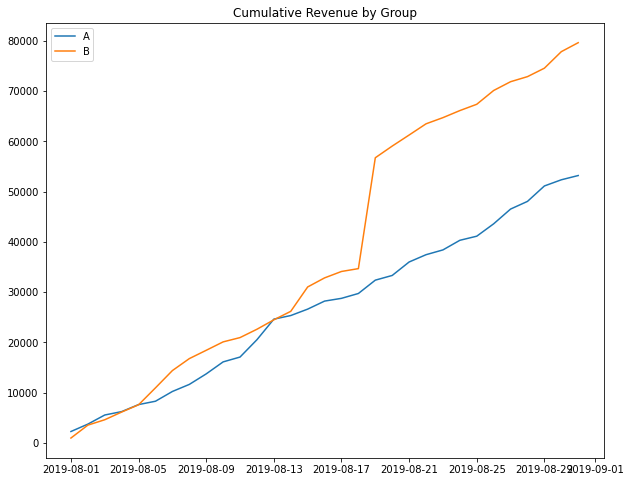

In [26]:
#Plotting the cumulative revenue graphs

plt.figure(figsize=(10,8))
plt.plot(cumulative_revA['date'],cumulative_revA['revenue'],label='A')
plt.plot(cumulative_revB['date'],cumulative_revB['revenue'],label='B')
plt.legend()
plt.title('Cumulative Revenue by Group')

plt.show()

From the graph it seems that almost from the beginning group B garnered more revenue than group A. But there are some sharp peaks in group B that indicates there may be outliers in the form of very expensive orders.

Let's see the cumulative average order size by group. We will find this by dividing the revenue by the number of orders from the cumulative dataset

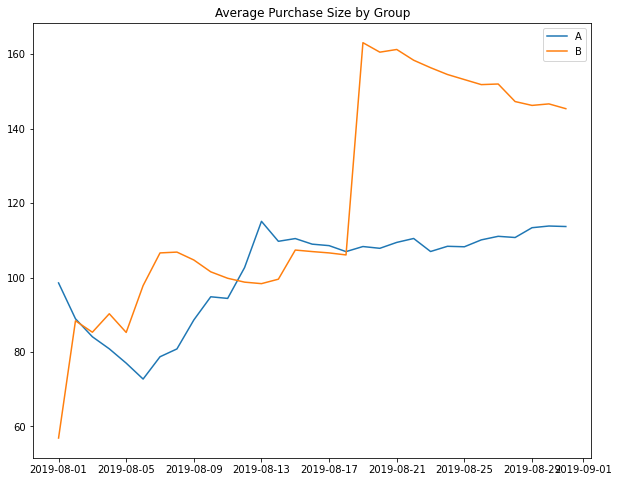

In [27]:
plt.figure(figsize=(10,8))
plt.plot(cumulative_revA['date'],cumulative_revA['revenue']/cumulative_revA['orders'],label='A')
plt.plot(cumulative_revB['date'],cumulative_revB['revenue']/cumulative_revB['orders'],label='B')
plt.legend()
plt.title('Average Purchase Size by Group')
plt.show()

There are once again sharp peaks in group B that may be due to some large orders. For group A, it seems to be stablizing near the end of the test. Let's make the differences more apparent with a relative difference graph

In [28]:
#creating a merged cumulative dataframe
merged_cumulative= cumulative_revA.merge(
    cumulative_revB, left_on='date', right_on='date', how='left',suffixes=['A','B'])
merged_cumulative.head()

date  revenueA  ordersA  revenueB  ordersB
0 2019-08-01    2266.6       23     967.2       17
1 2019-08-02    3734.9       42    3535.3       40
2 2019-08-03    5550.1       66    4606.9       54
3 2019-08-04    6225.6       77    6138.5       68
4 2019-08-05    7623.6       99    7587.8       89

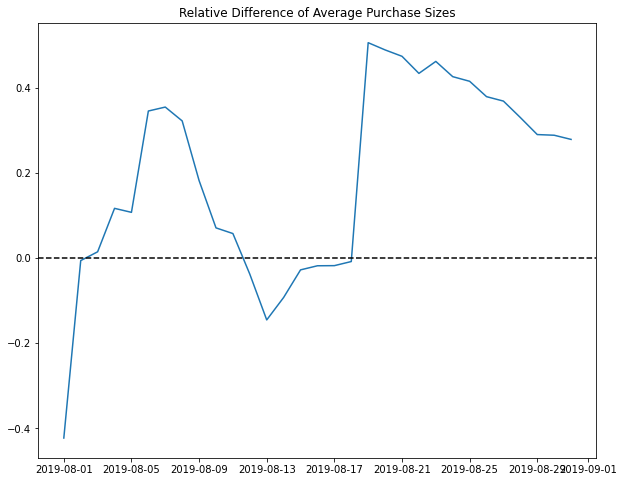

In [29]:
plt.figure(figsize=(10,8))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['revenueB']/merged_cumulative['ordersB'])/
    (merged_cumulative['revenueA']/merged_cumulative['ordersA'])-1)

plt.title('Relative Difference of Average Purchase Sizes')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

There are definite fluctuations, with B having a higher purchase number and then dropping before spiking again. 

Let's look at the daily conversion rate of each group by dividing the number of orders to the number of visits

In [30]:
cumulative_data['conversion']=cumulative_data['orders']/cumulative_data['n_visits']

In [31]:
cumulative_conA= cumulative_data[cumulative_data['group']=='A']
cumulative_conB= cumulative_data[cumulative_data['group']=='B']

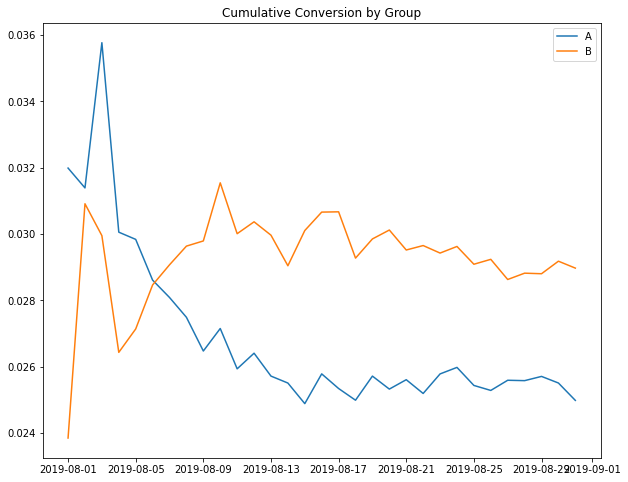

In [32]:
plt.figure(figsize=(10,8))
plt.plot(cumulative_conA['date'],cumulative_conA['conversion'],label='A')
plt.plot(cumulative_conB['date'],cumulative_conB['conversion'],label='B')
plt.title('Cumulative Conversion by Group')
plt.legend()
plt.show()

It seems as if the groups are stablilizing near the end. Let's see the distribution of the number of orders per user

In [33]:
orders.head()

transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B

In [34]:
#creating a dataframe with columns that will hold the visitorId and the number of unique
#transactionIds
ordersbyuser= (
orders.drop(['group','revenue','date'],axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersbyuser.columns=['userId','orders']
ordersbyuser

userId  orders
0       5114589       1
1       6958315       1
2      11685486       1
3      39475350       1
4      47206413       1
..          ...     ...
968  4259830713       1
969  4278982564       1
970  4279090005       1
971  4281247801       1
972  4283872382       1

[973 rows x 2 columns]

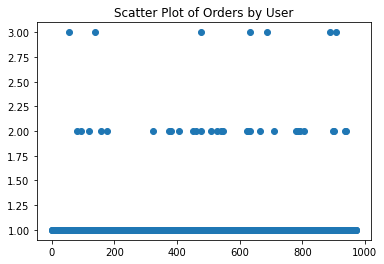

In [35]:
x_values= pd.Series(range(0,len(ordersbyuser)))
plt.scatter(x_values,ordersbyuser['orders'])
plt.title('Scatter Plot of Orders by User')
plt.show()

The overwhelming majority of of users made 1 order, there are those who made 2, and even less of those made 3 orders. Let's calculate the percentile for orders by user.

In [36]:
np.percentile(ordersbyuser['orders'], [95, 99])

array([1., 2.])

There are no more than 5% of users made 1 one purchase and no more than 1% of users made 2 purchases. I will consider orders of more than 1 purchase as an anomaly. 

Now I will look into anomalies for order prices/revenue

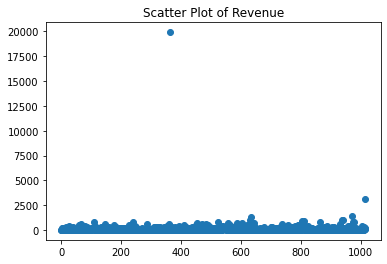

In [37]:
x_values= pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Scatter Plot of Revenue')
plt.show()

Majority of prices were below 2500 with a few outliers above that price

In [38]:
np.percentile(orders['revenue'],[95,99])

array([414.275, 830.3  ])

No more than 5% of revenue prices were more than 414.275 and no more than 1% of revenue was 830.3. I will define anomalies as revenue prices over 415.

Now I will calculate the statistical significance of the difference in conversion between the groups

In [39]:
visits.head()

date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756

In [40]:
orders.head()

transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B

In [41]:
#declaring variables that per group that will hold visitorID and transactionId

ordersbyuserA= orders[orders['group']=='A'].groupby('visitorId',as_index=False).agg({
    'transactionId':pd.Series.nunique
})
ordersbyuserA.columns=['visitorId','orders']


ordersbyuserB= orders[orders['group']=='B'].groupby('visitorId',as_index=False).agg({
    'transactionId':pd.Series.nunique
})
ordersbyuserB.columns=['visitorId','orders']

print(ordersbyuserA)
ordersbyuserB

      visitorId  orders
0      11685486       1
1      54447517       1
2      66685450       1
3      78758296       1
4      85103373       1
..          ...     ...
440  4227830084       1
441  4237561104       1
442  4243832526       1
443  4259830713       1
444  4278982564       1

[445 rows x 2 columns]


visitorId  orders
0       5114589       1
1       6958315       1
2      39475350       1
3      47206413       1
4      48147722       1
..          ...     ...
523  4251115836       1
524  4258103007       1
525  4279090005       1
526  4281247801       1
527  4283872382       1

[528 rows x 2 columns]

In [42]:

sampleA= pd.concat([ordersbyuserA['orders'],pd.Series(0,
index= np.arange(visits[visits['group']=='A']['visits'].sum()-len(ordersbyuserA['orders'])),name='orders')],axis=0)

sampleB= pd.concat([ordersbyuserB['orders'],pd.Series(0,
index= np.arange(visits[visits['group']=='B']['visits'].sum()-len(ordersbyuserB['orders'])),name='orders')],axis=0)

sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [43]:
#calculating the statistical significance using the Mann-Whitney Test

'{0:.3f}'.format(stats.mannwhitneyu(sampleA,sampleB)[1])

'0.011'

In [44]:
#calculating the relative difference between group A and B
'{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)

'0.160'

With an alpha level of 0.05, this p-value of 0.011 is less than the significance level, which means we can reject the null hypothesis that there isn't a significant difference between the conversation rates of group A and B. 
Group B has a relative gain of 0.160 or 16% over group A

Now let's calculate the statistical significance of the average order size betweent the groups

In [45]:
orders.head()

transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B

In [46]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                 orders[orders['group']=='B']['revenue'])[1])

'0.862'

In [47]:
#calculating the relative difference in average order size for group A and B
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.278'

With an alpha level of 0.05, this p-value of 0.862 means we cannot reject the null hypothesis-- there is no statistically significant difference between the average order size of group A and B, though the average order size of group B is bigger than group A.

Now we are going to filter our data to take out the anomalies that were defined before: revenue prices over 415 and orders of more than 1 purchase.

In [48]:
#filtering out visitor id's where the visitor had more than 1 purchase
usersorderexcess= pd.concat(
[ordersbyuserA[ordersbyuserA['orders']> 1]['visitorId'],
 ordersbyuserB[ordersbyuserB['orders']> 1]['visitorId']],axis=0)

usersorderexcess.head()

36      366673373
58      611059232
64      678354126
72      759473111
171    1617417821
Name: visitorId, dtype: int64

In [49]:
#filtering out the visitor id's where revenue is over 415

usersexpensive= orders[orders['revenue']> 415]['visitorId']
usersexpensive.head()

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitorId, dtype: int64

In [50]:
#merging the two dataframes 

abnormaldf= pd.concat([usersorderexcess,usersexpensive], axis=0).drop_duplicates().sort_values()
abnormaldf.shape[0]

86

There are 86 total visitor id's that would be considered anomalous by our definition. I will now create a filtered dataframes that do not contain these visitor id's

In [51]:
sampleA_filt= pd.concat(
    [ordersbyuserA[np.logical_not(ordersbyuserA['visitorId']
                                 .isin(abnormaldf))]['orders'],
    pd.Series(0,index=np.arange(visits[visits['group']=='A']['visits'].sum()
                               -len(ordersbyuserA['orders'])),name='orders')],axis=0)
sampleA_filt.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [52]:
sampleB_filt= pd.concat(
    [ordersbyuserB[np.logical_not(ordersbyuserB['visitorId']
                                 .isin(abnormaldf))]['orders'],
    pd.Series(0,index=np.arange(visits[visits['group']=='B']['visits'].sum()
                               -len(ordersbyuserB['orders'])),name='orders')],axis=0)
sampleB_filt.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [53]:
#testing the statistical significance of the conversion rate with the filtered data
'{0:.3f}'.format(stats.mannwhitneyu(sampleA_filt,sampleB_filt)[1])

'0.016'

In [54]:
#testing the relative difference of conversion rates between groups
'{0:.3f}'.format(sampleB_filt.mean()/sampleA_filt.mean()-1)

'0.174'

With an alpha level of 0.05, this p-value of 0.016 indicates there is evidence to reject the null hypothesis, meaning there is evidence that there is a statistical difference between the two groups. This isn't different from the raw data, but the p-value as well as the relative difference increased. 

Now I will find the statistical significance of the average orders size of the new filtered data

In [55]:
#calculating the statistical significance of the average order size 
'{0:.3f}'.format(stats.mannwhitneyu(
orders[np.logical_and(orders['group']=='A',
                     np.logical_not(orders['visitorId'].isin(abnormaldf)))]['revenue'],
orders[np.logical_and(orders['group']=='B',
                     np.logical_not(orders['visitorId'].isin(abnormaldf)))]['revenue'])[1])

'0.771'

In [56]:
#calculating relative difference of average order size

'{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',
                          np.logical_not(orders['visitorId'].isin(abnormaldf)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormaldf)))]['revenue'].mean() - 1)

'-0.033'

With an alpha level of 0.05 and p-value of 0.771, we cannot reject the null hypothesis, meaning there is not a statistically significant difference between the average order size of the group even though group B is a bit smaller than group A. This is no different than the raw data test, even though the p-value decreased and group B went from having a larger average order size to having a smaller one. 

# Decisions and Conclusion

The goal of this report was to priortize a hypothesis from a list of serveral hypotheses, as well as analyze the results of an A/B test. 
Using different frameworks (ICE and RICE) the I would suggest prioritizing hypothesis 7 as it appeared as one of the top hypotheses in both frameworks, was number 1 in the RICE framework, and a has much more considerable reach. 

Prior to analyzing the A/B test, I had to remove visitor id's of visitors who were found in both group A and group B. In analyzing the A/B test, I found anomalies that were affecting the conversion and average purchase rate between the groups. After defining those anomalies and removing them from the dataset, I re-did my Mann-Whitney test and found the relative differences between the groups. 

For the raw data: there was a statisically significant difference between the conversion rates of the two groups but there was not a significant difference between average order size.

For the filtered data: there was a statistically significant difference between the conversion rates and no significant difference between average order sizes.

Based on these findings, I would suggest stopping the test and declaring that group B the leader in terms of conversion rate. 